# Clustering

Clustering is an unsupervised learning technique useful to find similarity amongst data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load and plot data

In [36]:
df = pd.read_csv('../data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
import seaborn as sns

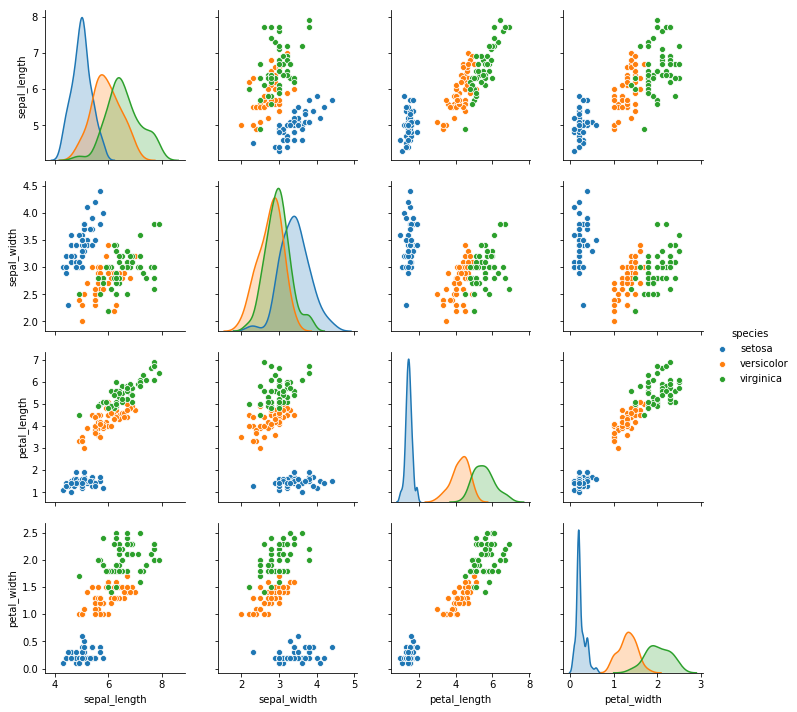

In [5]:
sns.pairplot(df, hue='species');

## Encode labels

In [14]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [37]:
df['target_n'] = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

## Kmeans clustering

In [38]:
from sklearn.cluster import KMeans

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
km = KMeans(3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
centers = km.cluster_centers_
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

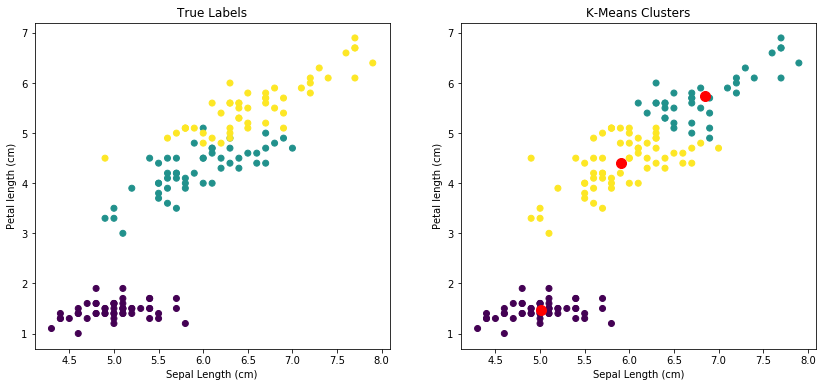

In [40]:
plt.figure(figsize = (14,6))
plt.subplot(121)
plt.scatter(df.sepal_length, df.petal_length, c=df['target_n'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('True Labels')

plt.subplot(122)
plt.scatter(df.sepal_length, df.petal_length, c=km.labels_)
plt.scatter(centers[:,0], centers[:,2], marker='o', c='r', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('K-Means Clusters')
plt.draw()
plt.show()


### Exercise 1
- discuss with your pair:
    - why do cluster centers have 4 coordinates?
    - do the colors in the two plots coincide? Why?
- change the number of clusters using the n_clusters parameter. What happens?
- change the initialization parameters of KMeans to 'random'. What happens?
- run the clustering multiple times, do the centroid positions change?

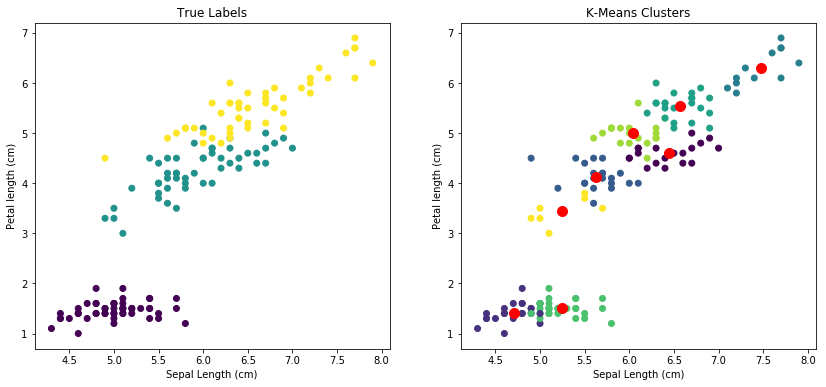

In [41]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
km = KMeans(8)
km.fit(X)

centers = km.cluster_centers_
centers

plt.figure(figsize = (14,6))
plt.subplot(121)
plt.scatter(df.sepal_length, df.petal_length, c=df['target_n'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('True Labels')

plt.subplot(122)
plt.scatter(df.sepal_length, df.petal_length, c=km.labels_)
plt.scatter(centers[:,0], centers[:,2], marker='o', c='r', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('K-Means Clusters')
plt.draw()
plt.show()

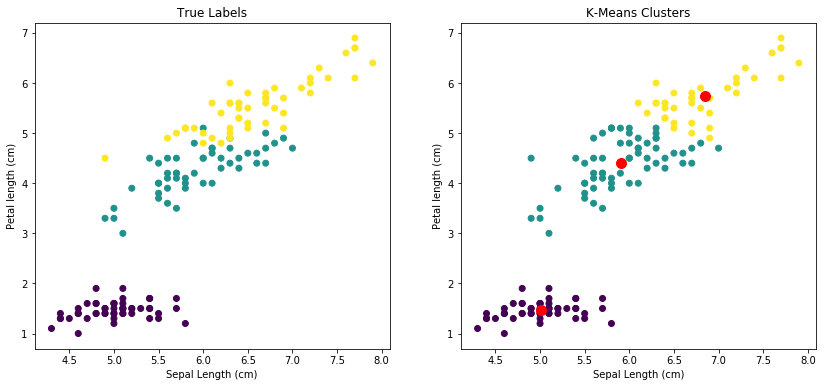

In [42]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
km = KMeans(3,init='random')
km.fit(X)

centers = km.cluster_centers_
centers

plt.figure(figsize = (14,6))
plt.subplot(121)
plt.scatter(df.sepal_length, df.petal_length, c=df['target_n'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('True Labels')

plt.subplot(122)
plt.scatter(df.sepal_length, df.petal_length, c=km.labels_)
plt.scatter(centers[:,0], centers[:,2], marker='o', c='r', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('K-Means Clusters')
plt.draw()
plt.show()

### Exercise 2
- calculate silhouette_score for different values of k. You will have to extract the labels from km at different values of k
- plot the silhouette score as a function of k for k between 2 and 10
- discuss with your pair:
    - what value of k gives the highest silhouette score?
    - did you expect that result?

In [11]:
from sklearn.metrics import silhouette_score

In [13]:
from sklearn.neighbors import KNeighborsClassifier

### Exercise 3

Try clustering with another method of the ones you find here: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html


In [12]:
from sklearn.cluster import DBSCAN

In [43]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
DB = DBSCAN()
DB.fit(X)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

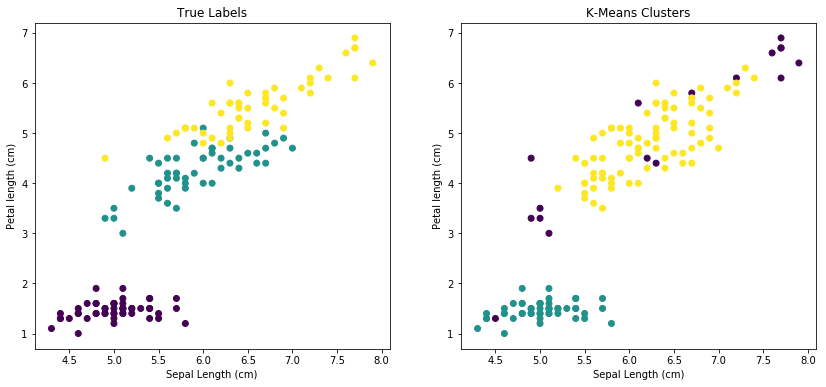

In [44]:
plt.figure(figsize = (14,6))
plt.subplot(121)
plt.scatter(df.sepal_length, df.petal_length, c=df['target_n'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('True Labels')

plt.subplot(122)
plt.scatter(df.sepal_length, df.petal_length, c=DB.labels_)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('K-Means Clusters')
plt.draw()
plt.show()

In [45]:
pd.Series(DB.labels_).value_counts().head(20)

 1    84
 0    49
-1    17
dtype: int64

### Exercise 4

In the data folder you can find two more datasets ready for clustering:

- `../data/Wholesale customers data.csv`
- `../data/Absenteeism_at_work.csv`


Choose one and repeat the following steps:

1. Load the dataset
- Inspect it with `.read()` and `.info()`
- decide which features you are going to use for clustering (hint: categorical features are tricky, you may want to ignore them for now)
- rescale the features
- train K-Means and find the optimal value of K using the silhouette coefficient
- does the dataset cluster well?
- train DBSSCAN and check the number of clusters found
- inspect a couple of clusters and see if you can describe the members

In [62]:
df = pd.read_csv('../data/Wholesale customers data.csv')

In [63]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [47]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [64]:
df['Region'].unique()

array([3, 1, 2])

In [54]:
df['Channel'].unique()

array([2, 1])

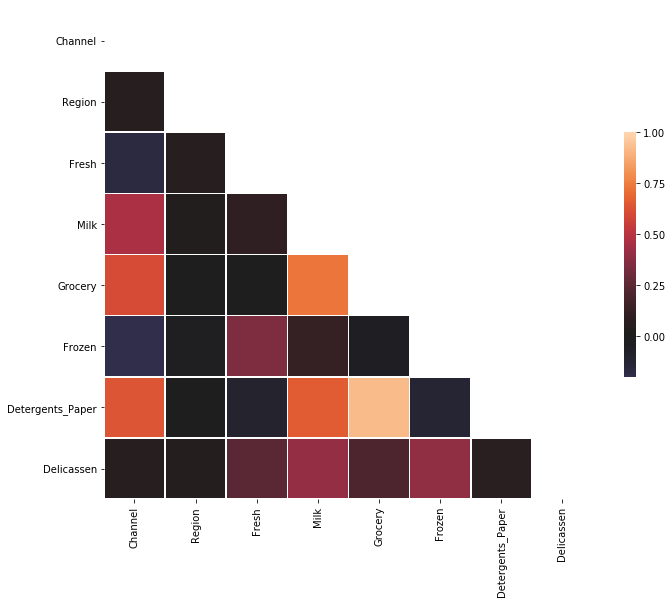

In [68]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


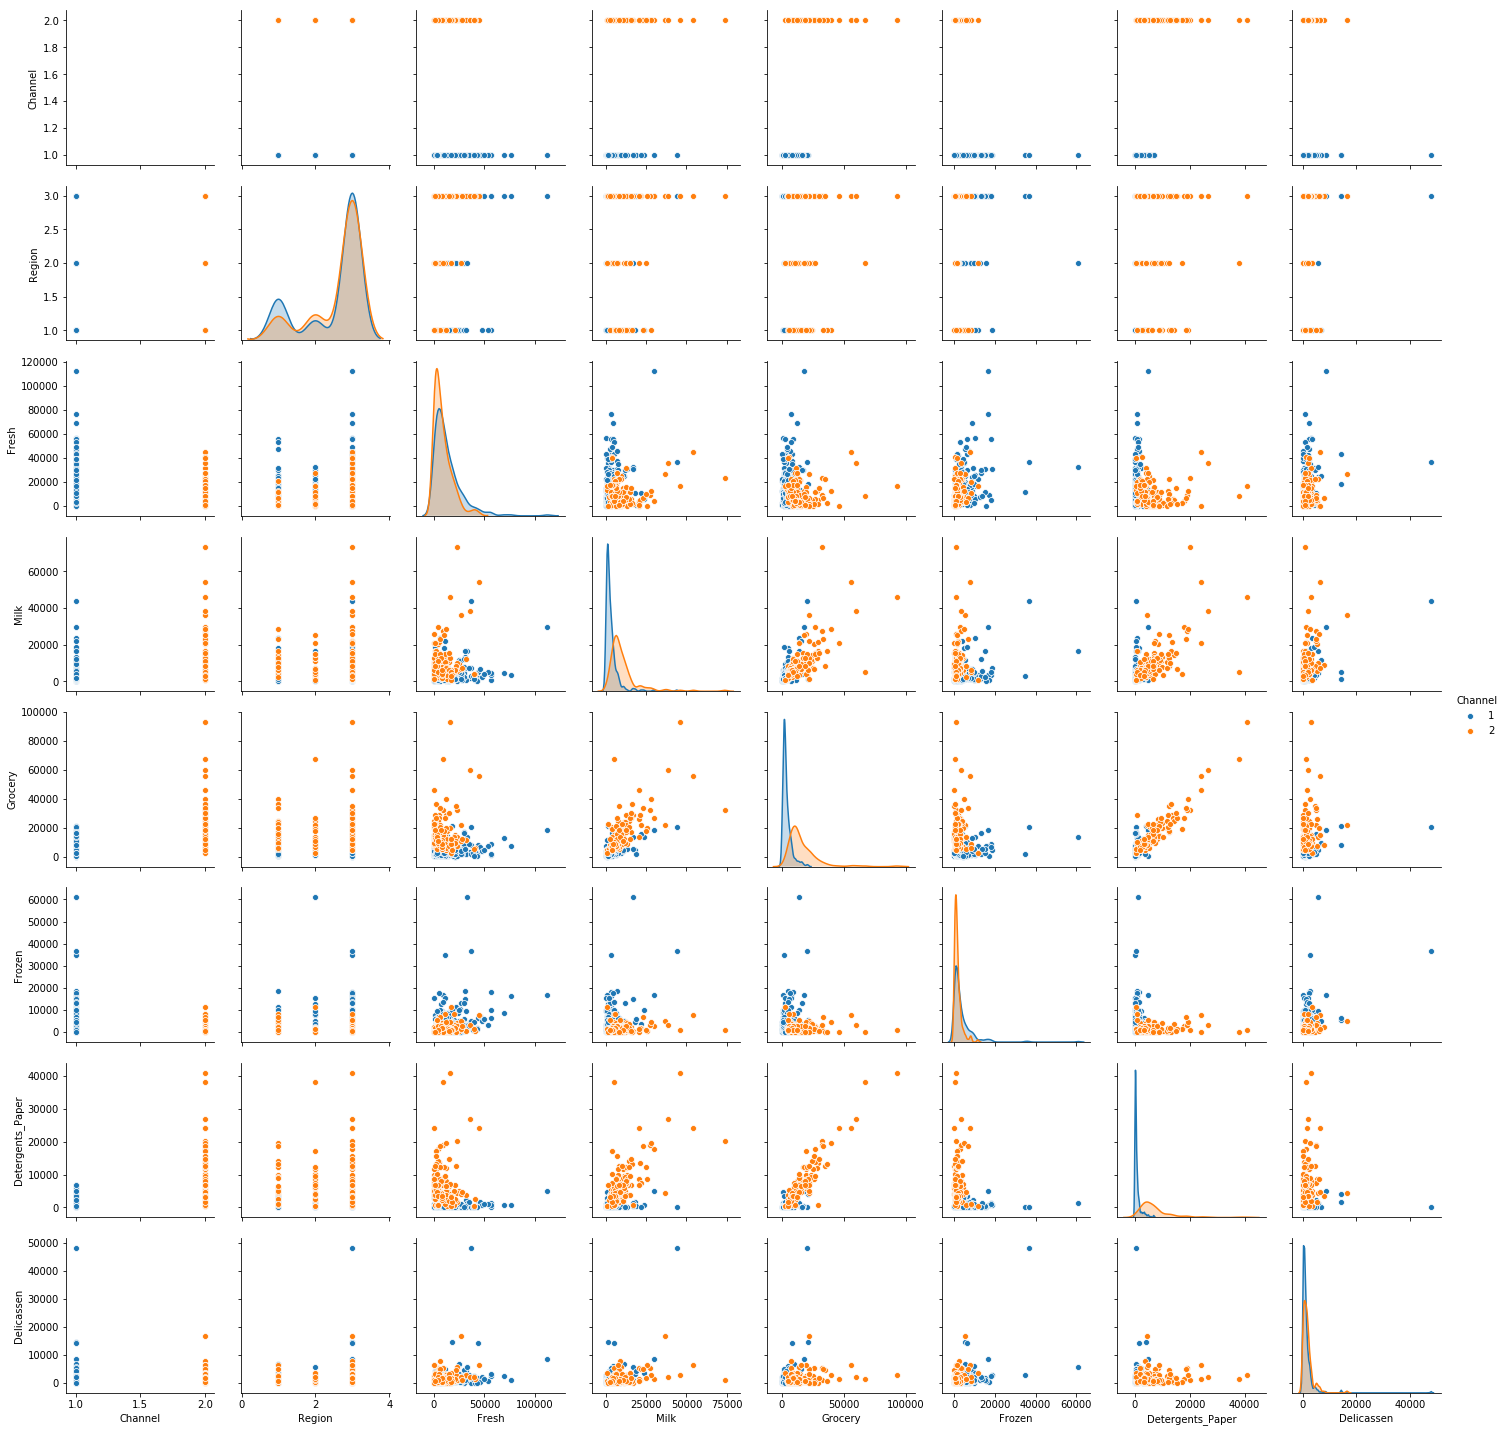

In [55]:
sns.pairplot(df, hue='Channel')

In [82]:
df = df.drop(columns=['Region','Channel'])

In [83]:
from sklearn.preprocessing import scale

In [84]:
df_scaled = pd.DataFrame(scale(df))

In [86]:
df_scaled.columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

In [87]:
df_scaled.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224
6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854
7,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601
8,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079
9,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461
